In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
titles = [line.strip() for line in open('all_book_titles.txt')]
titles

['Philosophy of Sex and Love A Reader',
 'Readings in Judaism, Christianity, and Islam',
 'Microprocessors Principles and Applications',
 'Bernhard Edouard Fernow: Story of North American Forestry',
 'Encyclopedia of Buddhism',
 'Motorola Microprocessor Family: 68000, 68008, 68010, 68020, 68030, and 68040, Programming and Interfacing with Applications',
 'American Anthem: Student Edition Modern Era 2007',
 'How to Read Literature Like a Professor A Lively and Entertaining Guide to Reading Between the Lines',
 'Men Are from Mars, Women Are from Venus Secrets of Great Sex, Improving Communication, Lasting Intimacy and Fulfillment, Giving and Receiving Love, Secrets of Passion, Understanding Martian',
 'Religious Traditions of the World A Journey Through Africa, Mesoamerica, North America, Judaism, Christianity, Islam, Hinduism, Buddhism, China, an',
 "World's Wisdom Sacred Texts of the World's Religions",
 "Illustrated World's Religions A Guide to Our Wisdom Traditions",
 'Soul of Sex Cu

In [15]:
stopwords = set(word.strip() for word in open('stopwords.txt'))
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

word_lemmatizer = WordNetLemmatizer()

In [16]:
def tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2]
    tokens = [word_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [17]:
tokenizer('my name is abhishek and i am 19 years old!!')

['name', 'abhishek']

In [18]:
word_2_int = {}
int_2_words = {}
ind = 0

error_count = 0
for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
        tokens = tokenizer(title)
        for token in tokens:
            if token not in word_2_int:
                word_2_int[token] = ind
                int_2_words[ind]=token
                ind += 1
    except Exception as e:
        print(e)
        print(title)
        error_count += 1

In [19]:
def tokens_2_vectors(tokens):
    X = np.zeros(len(word_2_int))
    for t in tokens:
        try:
            index = word_2_int[t]
            X[index]=1
        except:
            pass
    return X

In [20]:
final_matrix = np.zeros((len(titles),len(word_2_int)))

for i in range(len(titles)):
    title = titles[i]
    token = tokenizer(title)
    final_matrix[i,:] = tokens_2_vectors(token)

svd = TruncatedSVD()
Z = svd.fit_transform(final_matrix)

In [21]:
Z.shape

(2373, 2)

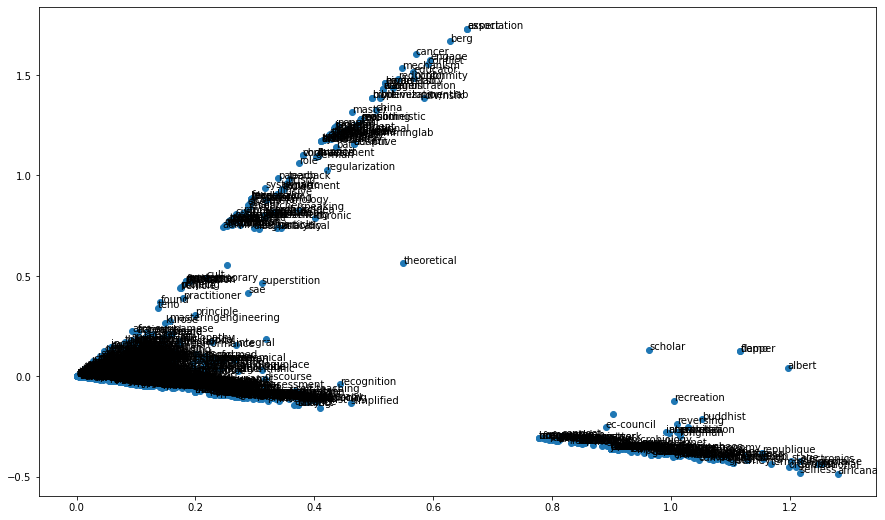

In [22]:
fig = plt.figure(figsize=(15,9))
plt.scatter(Z[:,0],Z[:,1])
for i in range(len(word_2_int)):
    plt.annotate(int_2_words[i],(Z[i,0],Z[i,1]))